<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Análise Exploratória da Infraestrutura no Brasil e suas consequências </font></h1>
<hr>

# Descrição e origem dos dados 

Os dados extraídos foram obtidos do [Gapminder](https://www.gapminder.org/data/), em formato xlsx e referem-se aos seguintes índices:

- Life Expectancy  
- Overall Basic Sanitation 
- Rural Basic Sanitation  
- Urban basic sanitation  
- overall basic water source
- rural water source  
- urban water source  
- corruption perception index 
- road paved percent   

Os registros se referem à dados em porcentagem de vários países. As colunas são anos (yyyy)


# Aquisição dos Dados






In [185]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [258]:
#Nessa etapa, importamos os dados dos arquivos em Excel, transformando-os em DataFrame,
#definindo a primeira linha se refere aos nomes das colunas

overall_basic_sanitation=pd.read_excel('at_least_basic_sanitation_overall_access_percent1.xlsx',header=0)
rural_basic_sanitation=pd.read_excel('at_least_basic_sanitation_rural_access_percent1.xlsx',header=0)
urban_basic_sanitation=pd.read_excel('at_least_basic_sanitation_urban_access_percent1.xlsx',header=0)
overall_basic_water_source=pd.read_excel('at_least_basic_water_source_overall_access_percent1.xlsx',header=0)
rural_water_source=pd.read_excel('at_least_basic_water_source_rural_access_percent1.xlsx',header=0)
urban_water_source=pd.read_excel('at_least_basic_water_source_urban_access_percent1.xlsx',header=0)
corruption_perception_index=pd.read_excel('corruption_perception_index_cpi1.xlsx',header=0)
life_expectancy=pd.read_excel('life_expectancy_years1.xlsx',header=0)
road_paved_percent=pd.read_excel('roads_paved_percent_of_total_roads1.xlsx',header=0)


#Para o objetivo do nosso trabalho, filtramos apenas as linhas que contêm o Brasil
# Aplicamos transposta para transformar os anos em linhas - conveniencia tomada para plotar os gráficos

overall_basic_sanitation=overall_basic_sanitation.query('country == "Brazil"').T
overall_basic_sanitation.columns=['Overall_Basic_Sanitation']

rural_basic_sanitation=rural_basic_sanitation.query('country == "Brazil"').T
rural_basic_sanitation.columns=['Rural_Basic_Sanitation']

urban_basic_sanitation=urban_basic_sanitation.query('country == "Brazil"').T
urban_basic_sanitation.columns=['urban_basic_sanitation']

overall_basic_water_source=overall_basic_water_source.query('country == "Brazil"').T
overall_basic_water_source.columns=['overall_basic_water_source']

rural_water_source=rural_water_source.query('country == "Brazil"').T
rural_water_source.columns=['rural_water_source']


urban_water_source=urban_water_source.query('country == "Brazil"').T
urban_water_source.columns=['urban_water_source']

corruption_perception_index=corruption_perception_index.query('country == "Brazil"').T
corruption_perception_index.columns=['corruption_perception_index']

life_expectancy=life_expectancy.query('country == "Brazil"').T
life_expectancy.columns=['Life_Expectancy']

road_paved_percent=road_paved_percent.query('country == "Brazil"').T
road_paved_percent.columns=['road_paved_percent']



#Fizemos a união de todos os dataframes em um único. Transformamos as variáveis em colunas,
#Logo obtem-se um Data-frame sobre a condição de infraestrutura no Brasil

life_expectancy=life_expectancy.merge(overall_basic_sanitation,how='left',left_index=True,right_index=True)
life_expectancy=life_expectancy.merge(rural_basic_sanitation,how='left',left_index=True,right_index=True)
life_expectancy=life_expectancy.merge(urban_basic_sanitation,how='left',left_index=True,right_index=True)
life_expectancy=life_expectancy.merge(overall_basic_water_source,how='left',left_index=True,right_index=True)
life_expectancy=life_expectancy.merge(rural_water_source,how='left',left_index=True,right_index=True)
life_expectancy=life_expectancy.merge(urban_water_source,how='left',left_index=True,right_index=True)
life_expectancy=life_expectancy.merge(corruption_perception_index,how='left',left_index=True,right_index=True)
life_expectancy=life_expectancy.merge(road_paved_percent,how='left',left_index=True,right_index=True)

#Tratamento de Dados - Deletamos a primeira linha, que nao possuia informação relevante.
#Transformamos os dados em float
life_expectancy.drop('country',inplace=True)
life_expectancy=life_expectancy.astype(float, errors='ignore')

# Análise dos Dados


## Estrutura dos Dados



O plot abaixo descreve a destribuição dos dados para cada coluna. Observamos que apenas a coluna de Life_Expectance possui dados históricos muito antigos, assim como previsão para os próximos anos

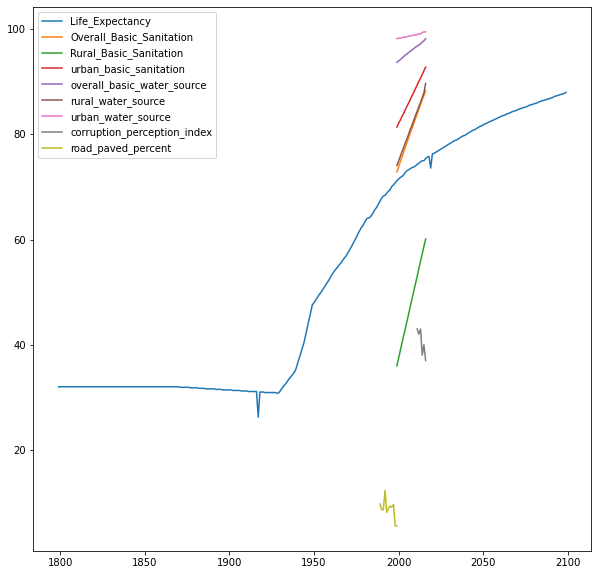

In [187]:
_=life_expectancy.plot(figsize=(10,10))

Abaixo, segue a descrição das colunas. Vemos que existem valores nulos. Isso se deve pois A coluna life_expectancy possui colunas a mais em relação aos outros features

In [188]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 1799 to 2099
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Life_Expectancy              301 non-null    float64
 1   Overall_Basic_Sanitation     18 non-null     float64
 2   Rural_Basic_Sanitation       18 non-null     float64
 3   urban_basic_sanitation       18 non-null     float64
 4   overall_basic_water_source   18 non-null     float64
 5   rural_water_source           18 non-null     float64
 6   urban_water_source           18 non-null     float64
 7   corruption_perception_index  6 non-null      float64
 8   road_paved_percent           11 non-null     float64
dtypes: float64(9)
memory usage: 23.5+ KB


Realizamos abaixo um tratamento de dados para otimizar as futuras análises, restrigindo o range onde a maioria dos dados não são nulos

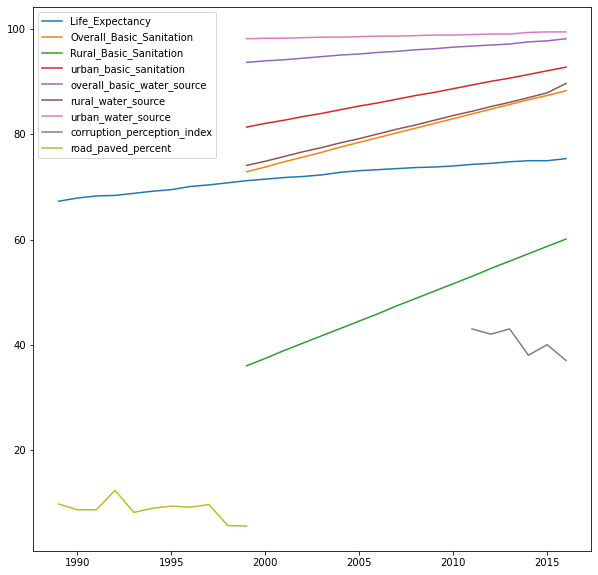

In [189]:
life_expectancy=life_expectancy.loc[1989:2016]
_=life_expectancy.plot(figsize=(10,10))

In [190]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1989 to 2016
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Life_Expectancy              28 non-null     float64
 1   Overall_Basic_Sanitation     18 non-null     float64
 2   Rural_Basic_Sanitation       18 non-null     float64
 3   urban_basic_sanitation       18 non-null     float64
 4   overall_basic_water_source   18 non-null     float64
 5   rural_water_source           18 non-null     float64
 6   urban_water_source           18 non-null     float64
 7   corruption_perception_index  6 non-null      float64
 8   road_paved_percent           11 non-null     float64
dtypes: float64(9)
memory usage: 2.2+ KB


In [191]:
life_expectancy.describe()

,Life_Expectancy,Overall_Basic_Sanitation,Rural_Basic_Sanitation,urban_basic_sanitation,overall_basic_water_source,rural_water_source,urban_water_source,corruption_perception_index,road_paved_percent
count,28.000000,18.00000,18.000000,18.000000,18.000000,18.000000,18.000000,6.000000,11.000000
mean,71.882143,80.70000,48.072222,87.055556,95.922222,81.455556,98.800000,40.500000,8.663636
std,2.456896,4.84088,7.571526,3.571327,1.367503,4.698713,0.408728,2.588436,1.885350
min,67.300000,72.90000,36.000000,81.400000,93.700000,74.100000,98.200000,37.000000,5.500000
25%,69.950000,76.85000,42.050000,84.175000,94.875000,77.725000,98.500000,38.500000,8.350000
50%,72.150000,80.75000,48.100000,87.050000,95.950000,81.400000,98.750000,41.000000,8.900000
75%,73.850000,84.57500,54.125000,89.925000,96.950000,85.075000,99.075000,42.750000,9.450000
max,75.400000,88.30000,60.100000,92.800000,98.200000,89.700000,99.500000,43.000000,12.300000


## Análise (pergunta) 1.



**A melhora no acesso a água urbana apresentou % a mesma melhora do acesso a água rural?**



Text(0, 0.5, '%')

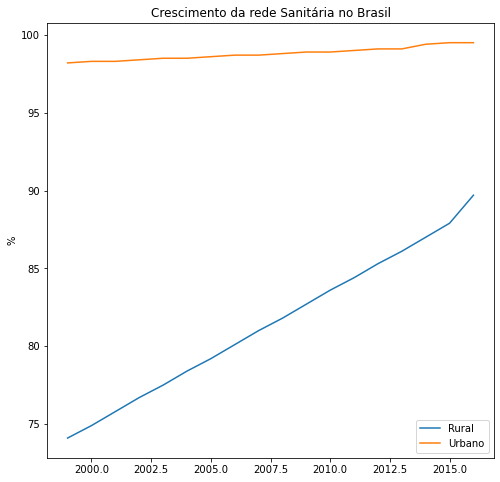

In [229]:
plt.figure(figsize=(8,8))

sns.lineplot(x=life_expectancy.index, y='rural_water_source', 
             data=life_expectancy)
sns.lineplot(x=life_expectancy.index, y='urban_water_source', 
             data=life_expectancy)
plt.title('Crescimento da rede Sanitária no Brasil')
plt.legend(['Rural','Urbano'])
plt.ylabel("%")

Avaliamos que pela inclinação das retas acima, o índice Rural teve uma tendência de melhora mais aguda nos anos 2000 até 2015. Já o meio urbano não apresentou grande variação, isso deve se explicar provavelmente pois o urbano teve melhoras no século anterior.

In [193]:
crescimento_rural=100*(life_expectancy.loc[2016,'rural_water_source']-life_expectancy.loc[1999,'rural_water_source'])/life_expectancy.loc[1999,'rural_water_source']
crescimento_urban=100*(life_expectancy.loc[2016,'urban_water_source']-life_expectancy.loc[1999,'urban_water_source'])/life_expectancy.loc[1999,'urban_water_source']

In [194]:
f'Vemos que o rural cresceu em uma taxa de: {crescimento_rural}% e o urbano em {crescimento_urban}%'

'Vemos que o rural cresceu em uma taxa de: 21.05263157894738% e o urbano em 1.3238289205702618%'

## Análise (pergunta) 2.

**O Brasil apresentou avanço no acesso ao saneamento publico das áreas rurais?**



Text(0, 0.5, '%')

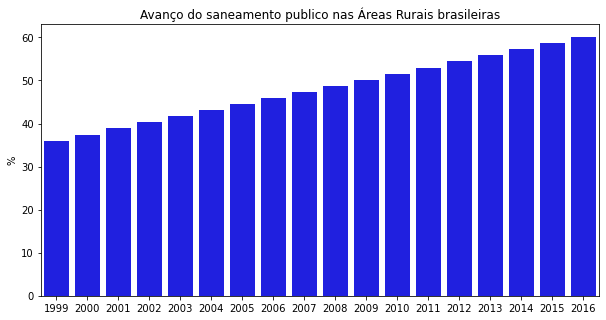

In [196]:
plt.figure(figsize=(10,5))
rural_years=life_expectancy.loc[1999:2016]
sns.barplot(data=rural_years,x=rural_years.index,y='Rural_Basic_Sanitation',color='blue')
plt.title('Avanço do saneamento publico nas Áreas Rurais brasileiras')
plt.ylabel("%")

Sim, podemos verificar que o acesso ao saneamento básico praticamente dobrou nos últimos 16 anos

## Análise (pergunta) 3.

**Percentualmente falando, como avançou a pavimentação de estradas no Brasil?**

**...**. ...

Text(0, 0.5, '%')

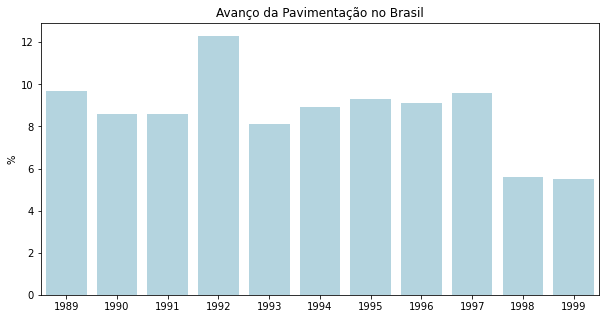

In [199]:
plt.figure(figsize=(10,5))
pav_years=life_expectancy.loc[1989:1999]
sns.barplot(data=pav_years,x=pav_years.index,y='road_paved_percent',color='lightblue')
plt.title('Avanço da Pavimentação no Brasil')
plt.ylabel("%")

Podemos verificar que a Pavimentação Brasileira não apresentou uma tendência crescente. Existem variações em torno de 10%, e a mesma piorou entre 1998 e 1999

## Análise (pergunta) 4.

**Em qual período o Brasil apresentou maior melhor na expectativa de vida?**

**...**. ...

In [214]:
life_expectancy_brasil=pd.read_excel('life_expectancy_years1.xlsx',header=0)
life_expectancy_brasil=life_expectancy_brasil.query('country == "Brazil"').T
life_expectancy_brasil.columns=['Life_Expectancy']
life_expectancy_brasil.drop('country',inplace=True)
life_expectancy_brasil=life_expectancy_brasil.astype(float, errors='ignore')

Text(0.5, 1.0, 'Indice de expectativa de vida no Brasil')

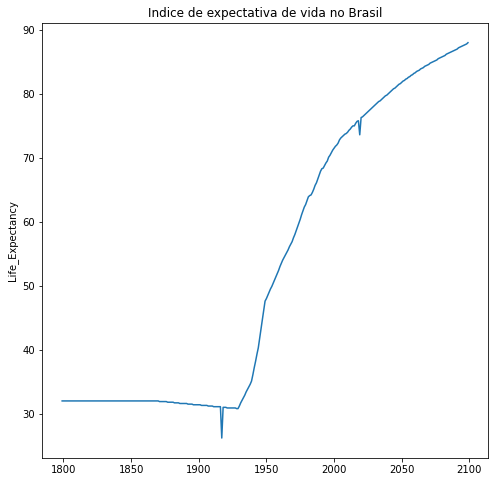

In [224]:
plt.figure(figsize=(8,8))
# life_exp=life_expectancy.loc[:2020]
sns.lineplot(x=life_expectancy_brasil.index, y='Life_Expectancy', 
             data=life_expectancy_brasil)
plt.title("Indice de expectativa de vida no Brasil")

A partir dessa gráfico podemos notar uma inclinação maior entre os anos 1900 e 1950

Para compreendermos melhor, criamos um gráfico de taxa de crescimento, e podemos concluir que o periodo que melhor apresentou o indice de expectativa de vida foi de 1925 a 1950. Uma outra análise interessante é que houve um pico drástico entre 1914 e 1918, o período que coincide com a Primeira Guerra Mundial

Text(0.5, 1.0, 'Taxa de Crescimento da Expectativa de vida no Brasil')

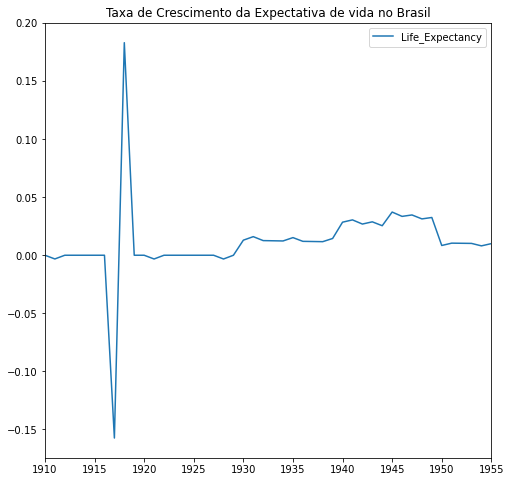

In [235]:
life_expectancy_brasil.pct_change(axis=0).plot(figsize=(8,8),xlim=(1910,1955))
plt.title("Taxa de Crescimento da Expectativa de vida no Brasil")

## Análise (pergunta) 5.

**É possivel fazer uma correlação na melhora dos indicadores gerais de infraestrutura com o aumento da expectativa de vida da população?**

**...**. ...

Vemos que os dados de estrutura sanitária e água são extremamente positivamente correlacionados com expectativa de vida, enquanto que a pavimentação de ruas é negativamente correlacionada. A correlação faz sentido, tendo em vista que água e condições sanitárias são importantes fatores para aumentar a expectativa de vida.

In [237]:
corr=life_expectancy.corr()[:1][['Overall_Basic_Sanitation','overall_basic_water_source','road_paved_percent']].T

(-1.0, 1.0)

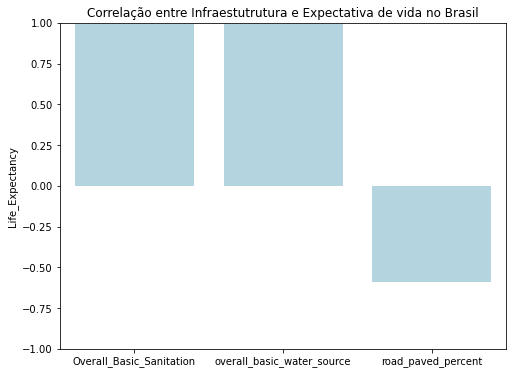

In [240]:
#ajeitar o tamanho do y -1 e 1  
plt.figure(figsize=(8,6))

sns.barplot(data=corr,x=corr.index,y='Life_Expectancy',color='lightblue')
plt.title('Correlação entre Infraestutrutura e Expectativa de vida no Brasil')
# plt.ylabel("%")
plt.ylim(-1,1)

In [241]:
corr

,Life_Expectancy
Overall_Basic_Sanitation,0.994769
overall_basic_water_source,0.994484
road_paved_percent,-0.592861


## Análise (pergunta) 6.

**O aumento da percepção de corrupção sobre o Brasil acompanhou a melhora da infraestrtura do país?** .

**...**. ...

Não podemos enxergar uma relação conclusive entre infraestrutura e percepção de corrupção.

In [294]:
percent_change=life_expectancy[['corruption_perception_index','Overall_Basic_Sanitation','overall_basic_water_source']].loc[2011:2016].T

In [295]:
percent_change=percent_change.pct_change(axis='columns').T

<AxesSubplot:>

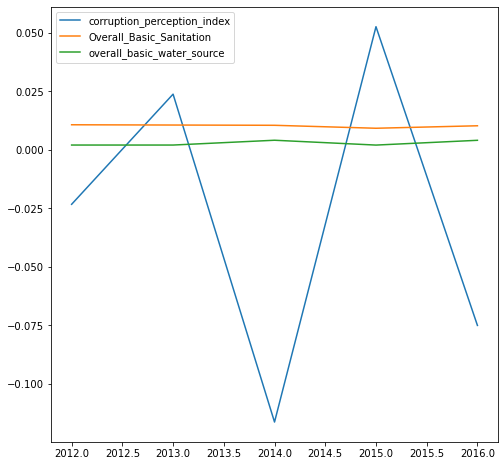

In [303]:
percent_change.plot(figsize=(8,8))

# Conclusão

Concluimos que expectativa de vida no Brasil aumentou nos últimos 80 anos e que as condições de infraestrutura geral do Brasil também acompanharam esse crescimento, incluindo pavimentação, saneamento básico e fornecimento de água. Esse crescimento ocorreu principalmente na área rural. Comprovamos a alta correlação do saneamento básico e do fornecimento de água com as taxas de expectativa de vida. Por outro lado, a percepção de corrupção não apresentou dados conclusivos se comparados com os dados de infraestrutura.

---